In [36]:
%autosave 0
import numpy as np
import pandas as pd

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

from datetime import date, timedelta
from joblib import dump

import warnings
warnings.filterwarnings("ignore") 

Autosave disabled


Start Day : 28/03

Trying to predict number of new cases & deaths one day before

Working with data update everyday here : https://ourworldindata.org/coronavirus-source-data
I take the full dataset linked

In [37]:
## Today Data scrap on nb 00 
df = pd.read_csv(f"AzureSC\\Base_Files\\full_data{date.today()}.csv")

In [38]:
df.head(3)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [39]:
df.tail(3)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
24525,OWID_WRL,NaN,World,2020-06-17,8141722.0,141305.0,445380.0,6851.0,1044.507,18.128,...,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58
24526,OWID_WRL,NaN,World,2020-06-18,8318148.0,176426.0,450630.0,5250.0,1067.141,22.634,...,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58
24527,OWID_WRL,NaN,World,2020-06-19,8455738.0,137590.0,455761.0,5131.0,1084.792,17.652,...,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58


In [40]:
df['location'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Faeroe Islands', 'Falkland Isla

# Data Exploration

In [41]:
def massBalance(subject,df,country):
    """ Plot evolution of data by columns
    params :
        subject = name of cols concerned by the plot
        df = The Dataframe
        country = Name of location isolated for the plot
    """
    df = df[df['location'].isin([f"{country}"])]
    df = df.iloc[::-1]
    thisPlot = px.line(x=df["date"], y=df[f"{subject}"])
    thisPlot.update_layout(title=f"Covid {subject} {country}",
                           xaxis_title="Day",
                           yaxis_title="Volume",
                           font=dict(family="Courier New, monospace",size=18, color="#78281F"))
    thisPlot.show()

In [42]:
## Plotly graph will be not display on Git ##
massBalance("total_deaths",df,"World")
massBalance("total_deaths",df,"France")
massBalance("total_deaths",df,"China")
massBalance("total_deaths",df,"Italy")
massBalance("total_deaths",df,"Spain")
massBalance("total_deaths",df,"United States")
massBalance("total_deaths",df,"Germany")
massBalance("total_deaths",df,"Iran")
massBalance("total_deaths",df,"Turkey")
massBalance("total_deaths",df,"Brazil")

In [43]:
## Plotly graph will be not display on Git ##
massBalance("total_cases",df,"World")
massBalance("total_cases",df,"France")
massBalance("total_cases",df,"China")
massBalance("total_cases",df,"Italy")
massBalance("total_cases",df,"Spain")
massBalance("total_cases",df,"United States")
massBalance("total_cases",df,"United Kingdom")
massBalance("total_cases",df,"Germany")
massBalance("total_cases",df,"Iran")
massBalance("total_cases",df,"Turkey")
massBalance("total_cases",df,"Brazil")

In [44]:
def newOverTime(subject,df,country):
    df = df[df['location'].isin([f"{country}"])]
    df = df.iloc[::-1]
    thisPlot = px.bar(df, x=df["date"], y=df[f'{subject}'])
    thisPlot.update_layout(title=f"Covid {subject} {country}",
                           xaxis_title="Day",
                           yaxis_title="Volume",
                           font=dict(family="Courier New, monospace",size=18, color="#78281F"))
    thisPlot.show()

In [45]:
## Plotly graph will be not display on Git ##
newOverTime("new_cases",df,"World")
newOverTime("new_cases",df,"France")
newOverTime("new_cases",df,"China")
newOverTime("new_cases",df,"Italy")
newOverTime("new_cases",df,"Spain")
newOverTime("new_cases",df,"United States")
newOverTime("new_cases",df,"United Kingdom")
newOverTime("new_cases",df,"Germany")
newOverTime("new_cases",df,"Iran")
newOverTime("new_cases",df,"Turkey")
newOverTime("new_cases",df,"Brazil")

In [46]:
## Plotly graph will be not display on Git ##
newOverTime("new_deaths",df,"World")
newOverTime("new_deaths",df,"France")
newOverTime("new_deaths",df,"China")
newOverTime("new_deaths",df,"Italy")
newOverTime("new_deaths",df,"Spain")
newOverTime("new_deaths",df,"United States")
newOverTime("new_deaths",df,"United Kingdom")
newOverTime("new_deaths",df,"Germany")
newOverTime("new_deaths",df,"Iran")
newOverTime("new_deaths",df,"Turkey")
newOverTime("new_deaths",df,"Brazil")

In [47]:
def worldrep(subject,graph_long=5,val_larg=1000000,df=df):
    fidf_mod = df.sort_values(subject, axis=0, ascending =False).head(500)
    f, ax = plt.subplots(figsize=(15, graph_long))

    ax.set(xlim=(0, val_larg), 
           ylabel= "Pays",
           xlabel= subject,
           Title= (f"{subject} by country")
          )
    ax.legend()
    sns.despine(top=True)
    ax = sns.barplot(x=fidf_mod[subject], y=fidf_mod["location"])


No handles with labels found to put in legend.


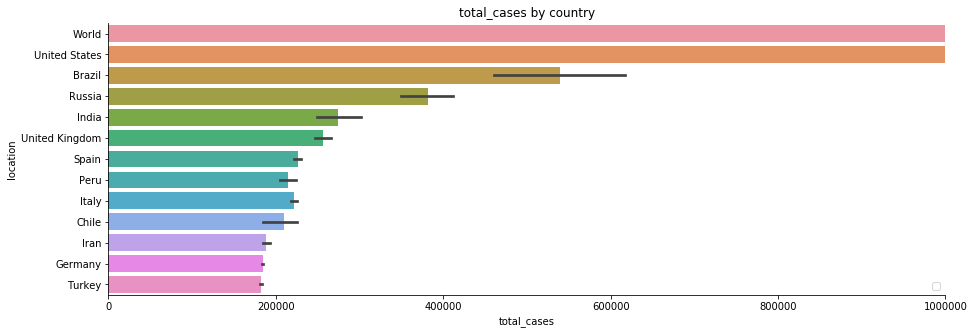

In [48]:
worldrep("total_cases")

No handles with labels found to put in legend.


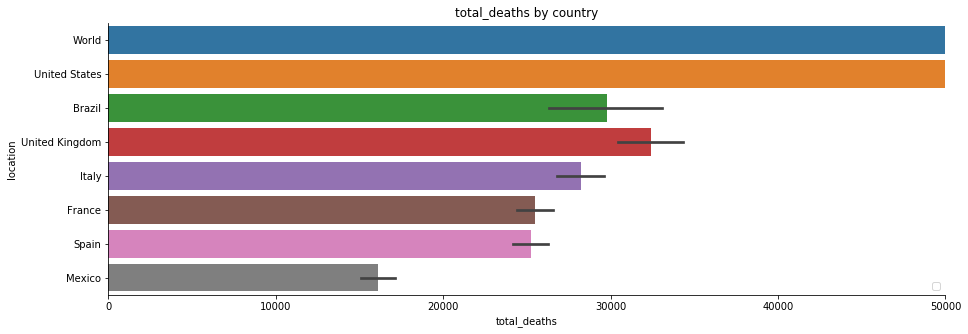

In [49]:
worldrep("total_deaths",val_larg=50000)

In [50]:
dds = df[df["date"].isin([f'{date.today()}'])]

No handles with labels found to put in legend.


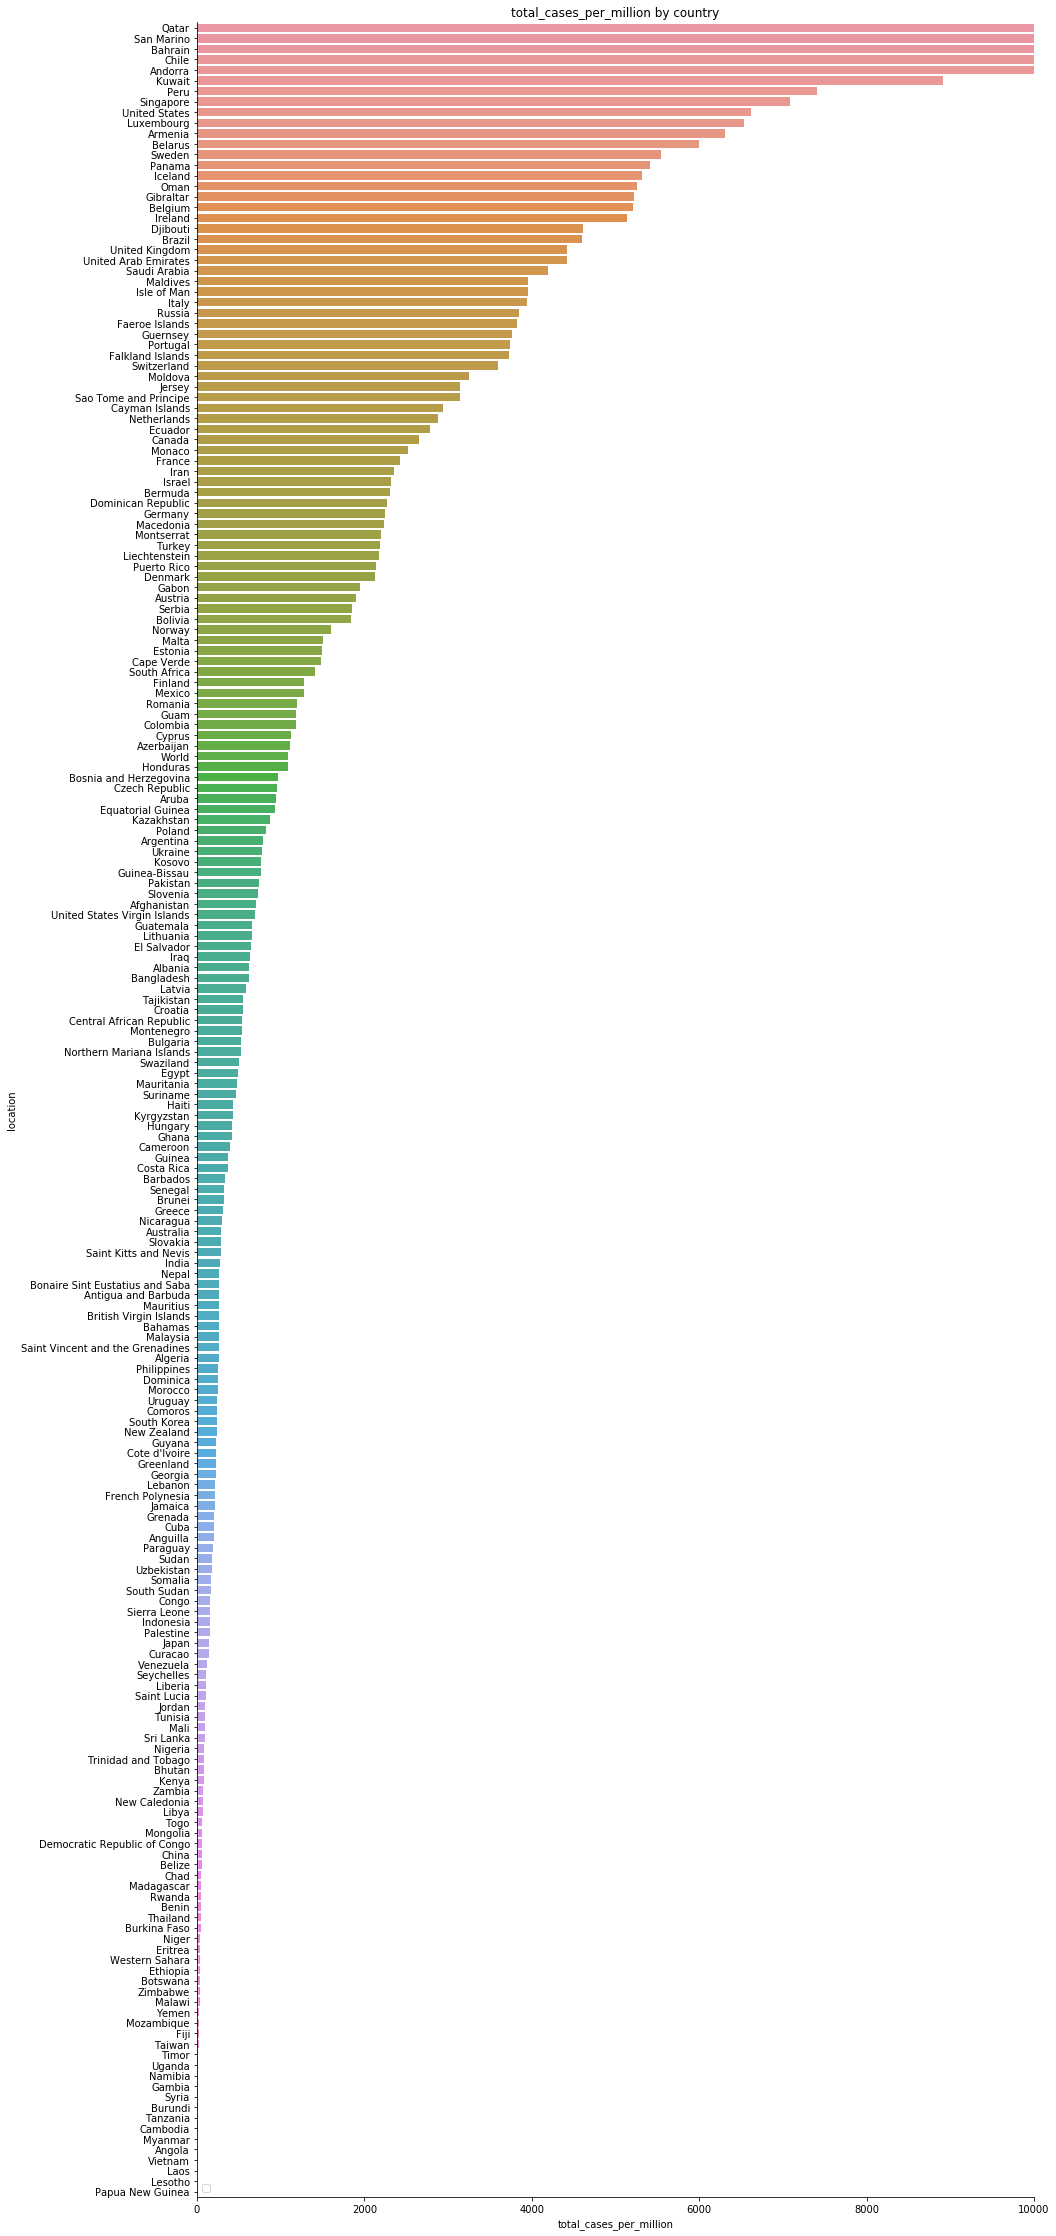

In [51]:
try:
    worldrep("total_cases_per_million",graph_long=40,val_larg=10000,df=dds)
except:
    print("Not today")

No handles with labels found to put in legend.


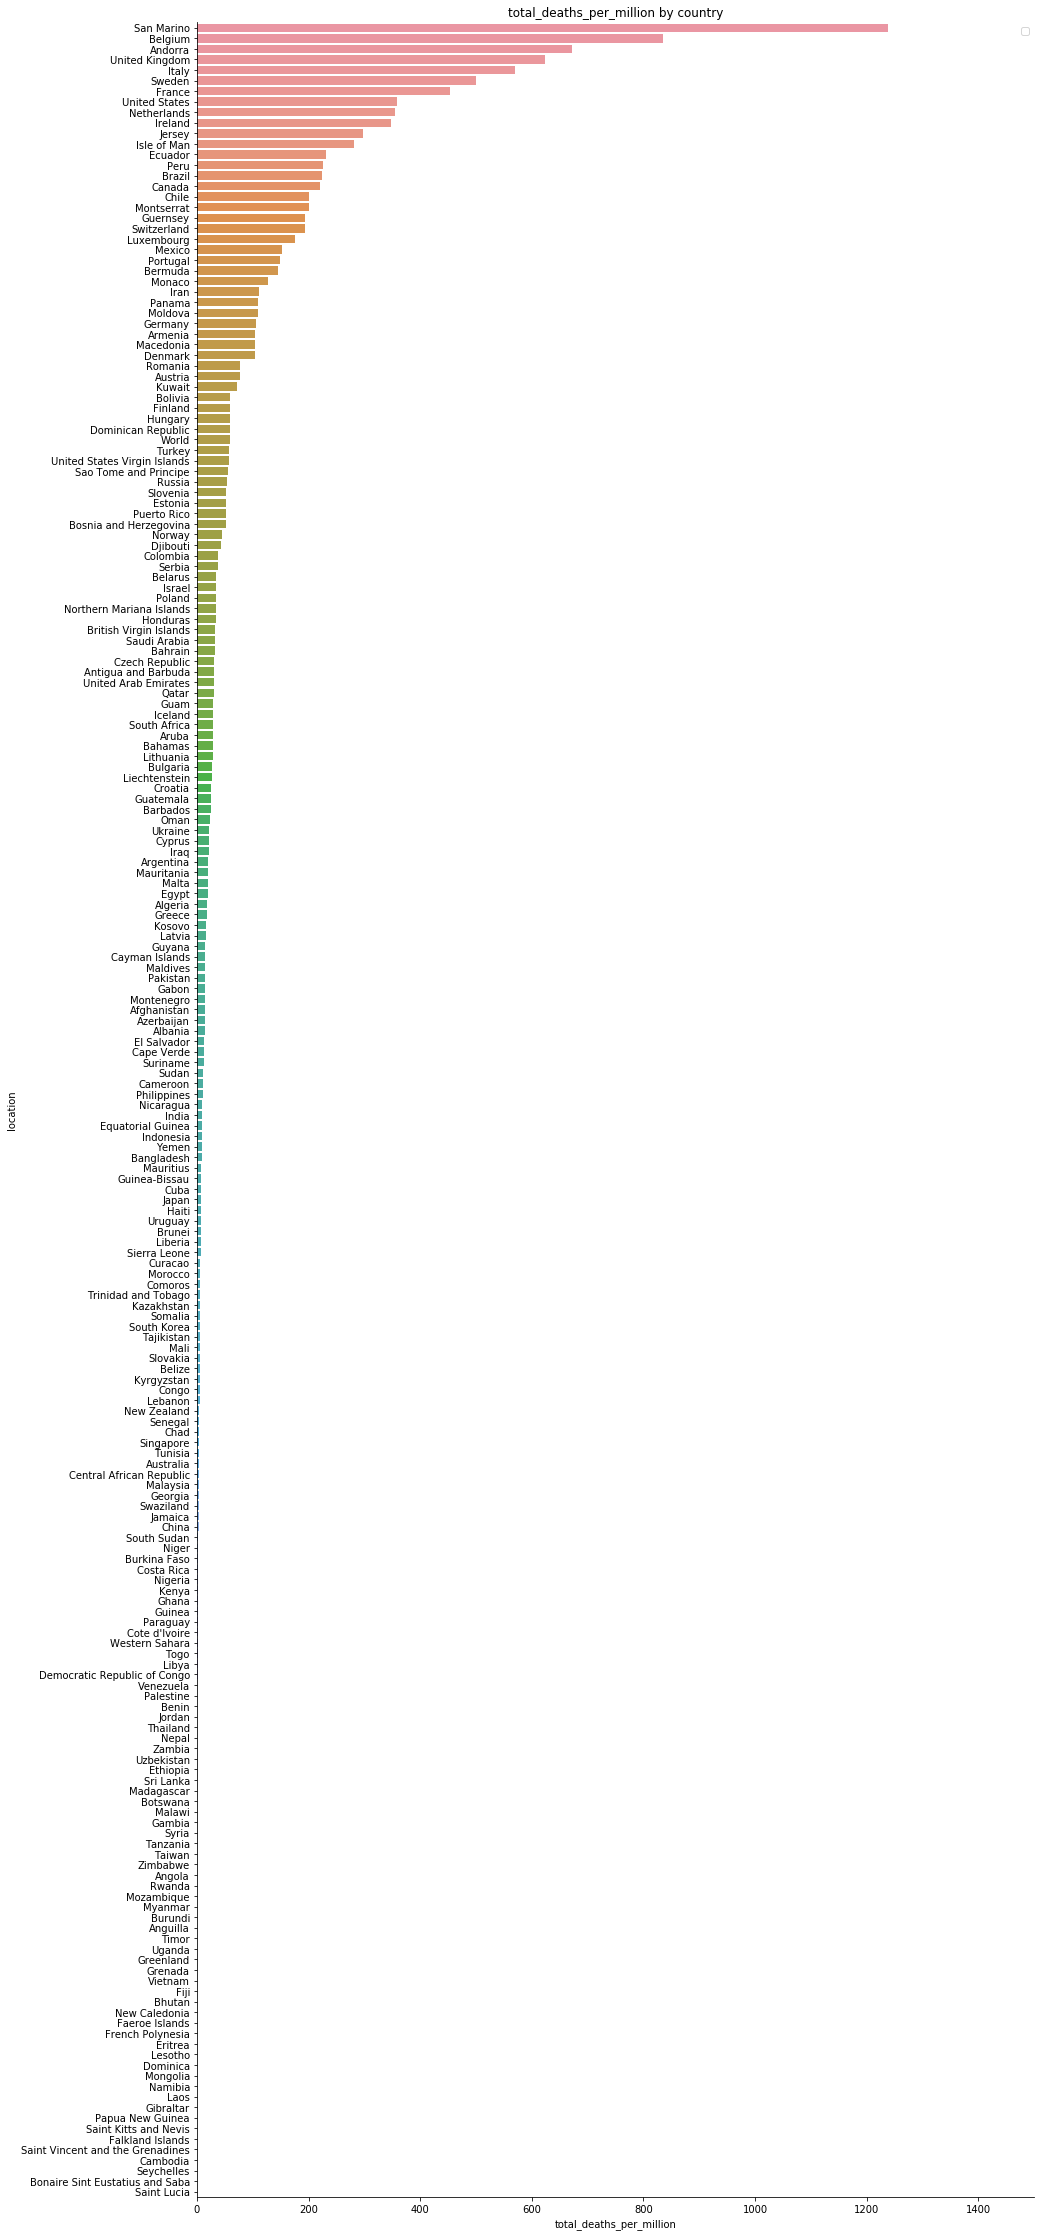

In [52]:
try :
    worldrep("total_deaths_per_million",graph_long=40,val_larg=1500,df=dds)
    is_full_data = True
except:
    is_full_data = False
    print("not today")

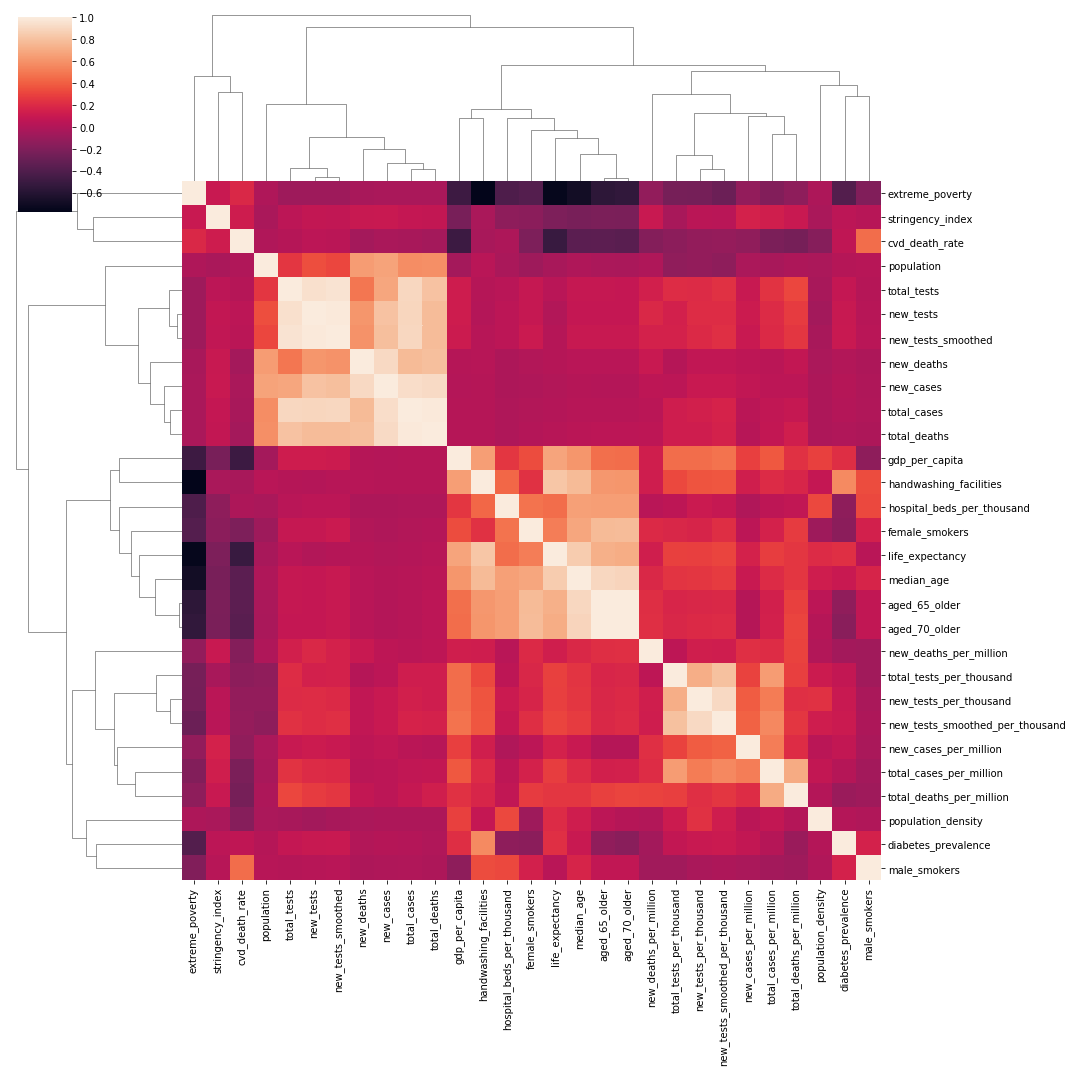

In [53]:
if is_full_data:
    corr = df.corr()
    sns.clustermap(corr,figsize=(15, 15))
else :
    print("not today")

# Modeling routines

In [54]:
def createModel(subject,periode,country,n_splits=3,max_iter=5000):
    
    df = pd.read_csv(f"AzureSC\\Base_Files\\full_data{date.today()}.csv")
    df = df[df['location'].isin([f"{country}"])] 
    vals = df[[f"{subject}"]].values
    
    hisShape = vals.shape[0]
    x_train = []
    y_train = []

    for i in range(periode,hisShape):
        x_train.append(vals[(i-periode):i,0]) 
        y_train.append(vals[i,0])

    x_train = np.array(x_train) 
    y_train = np.array(y_train)
    
    ###############################################################
    model = ElasticNet(random_state=0,max_iter=max_iter) 
    # tol=0.01 by reducing this hp warning disapear, pred will be highter 
    ###############################################################
    
    tscv = TimeSeriesSplit(n_splits=n_splits)
    scores = cross_val_score(model, x_train, y_train, cv=tscv)
    print(f"R^2: {scores.mean()} (+/- {scores.std()})")
    
    model.fit(x_train,y_train)
    print("Coef : ",model.coef_)
    
    return vals, x_train,y_train, model

In [55]:
def predicTomorow(vals,model,periode):
    tmw = vals[-periode:]
    lili = []
    for i in tmw:
        lili.append(int(i))
    lili = np.array(lili).reshape(1, -1) 
    res = int(model.predict(lili))
    last_day = lili[0][periode-1]
    diff_betw = res-last_day
    print(f"{periode} Last_days : ",lili)
    print("Today : ",last_day)
    print("Prediction + : ",diff_betw)
    print("Tomorow : ",res)
    return last_day, res

In [56]:
def conbine(subject,periode,country):
    vals, x_train, y_train, model = createModel(subject,periode,country)
    last_day, ress = predicTomorow(vals,model,periode)
    return last_day, ress

In [57]:
def fullRoutines(df,periode,country):
    print(f"********* For {country} **************")
    print("                                     ")
    print("--------- Total Cases -----------------")
    print("                                     ")
    last_day_cases, res1 = conbine("total_cases",periode,f"{country}")
    print("                                     ")
    print("--------- Total Death -----------------")
    print("                                     ")
    last_day_death, res2 = conbine("total_deaths",periode,f"{country}")
    print("                                     ")
    return last_day_cases, last_day_death, res1, res2

# Prediction Tomorow

In [58]:
periode = 3

In [59]:
last_day_cases, last_day_death, res1ww, res2ww = fullRoutines(df,periode,"World")
world_data = last_day_cases, last_day_death, res1ww, res2ww

********* For World **************
                                     
--------- Total Cases -----------------
                                     
R^2: 0.9977428252128568 (+/- 0.0020880119787005796)
Coef :  [-0.13380148  0.57530989  0.58136217]
3 Last_days :  [[8141722 8318148 8455738]]
Today :  8455738
Prediction + :  175550
Tomorow :  8631288
                                     
--------- Total Death -----------------
                                     
R^2: 0.9984291087197043 (+/- 0.00044176331705399647)
Coef :  [-0.75022285  0.83707134  0.91676329]
3 Last_days :  [[445380 450630 455761]]
Today :  455761
Prediction + :  5635
Tomorow :  461396
                                     


In [60]:
last_day_casesfr, last_day_deathfr, res1fr, res2fr = fullRoutines(df,periode,"France")
french_data = last_day_casesfr, last_day_deathfr, res1fr, res2fr

********* For France **************
                                     
--------- Total Cases -----------------
                                     
R^2: 0.8726636288587087 (+/- 0.1337447495541452)
Coef :  [-0.7755948   0.66485057  1.11020092]
3 Last_days :  [[157716 158174 158641]]
Today :  158641
Prediction + :  465
Tomorow :  159106
                                     
--------- Total Death -----------------
                                     
R^2: 0.37902162176248444 (+/- 0.5078476733388931)
Coef :  [-0.72949304  0.57323748  1.15554347]
3 Last_days :  [[29547 29575 29603]]
Today :  29603
Prediction + :  31
Tomorow :  29634
                                     


In [61]:
last_day_casesch, last_day_deathch, res1ch, res2ch = fullRoutines(df,periode,"China")
china_data = last_day_casesch, last_day_deathch, res1ch, res2ch

********* For China **************
                                     
--------- Total Cases -----------------
                                     
R^2: -2.313291917107319 (+/- 4.377258518912618)
Coef :  [-0.30718223 -0.05066237  1.35214763]
3 Last_days :  [[84422 84458 84494]]
Today :  84494
Prediction + :  73
Tomorow :  84567
                                     
--------- Total Death -----------------
                                     
R^2: -1355.2954325872745 (+/- 1917.7390952656206)
Coef :  [-0.07236066  0.01215905  1.05351956]
3 Last_days :  [[4638 4638 4638]]
Today :  4638
Prediction + :  12
Tomorow :  4650
                                     


In [62]:
last_day_casesit, last_day_deathit, res1it, res2it = fullRoutines(df,periode,"Italy")
italy_data = last_day_casesit, last_day_deathit, res1it, res2it

********* For Italy **************
                                     
--------- Total Cases -----------------
                                     
R^2: 0.8950987202483992 (+/- 0.1464979710753193)
Coef :  [-0.87875574  0.92531222  0.95299991]
3 Last_days :  [[237500 237828 238159]]
Today :  238159
Prediction + :  451
Tomorow :  238610
                                     
--------- Total Death -----------------
                                     
R^2: 0.5252147110848683 (+/- 0.668067753066107)
Coef :  [-0.87473519  0.92241988  0.95207338]
3 Last_days :  [[34405 34448 34514]]
Today :  34514
Prediction + :  65
Tomorow :  34579
                                     


In [63]:
try:
    last_day_casessp, last_day_deathsp, res1sp, res2sp = fullRoutines(df,periode,"Spain")
    spain_data = last_day_casessp, last_day_deathsp, res1sp, res2sp
except:
    print("No spain update")

********* For Spain **************
                                     
--------- Total Cases -----------------
                                     
R^2: 0.5147805469002368 (+/- 0.6005684397747255)
Coef :  [-0.88129726  0.90734949  0.97320656]
3 Last_days :  [[244328 244683 245268]]
Today :  245268
Prediction + :  408
Tomorow :  245676
                                     
--------- Total Death -----------------
                                     
R^2: 0.4513656475205558 (+/- 0.4989525422731919)
Coef :  [-0.87882157  0.90702724  0.97117331]
3 Last_days :  [[29054 29054 29054]]
Today :  29054
Prediction + :  14
Tomorow :  29068
                                     


In [64]:
last_day_casesus, last_day_deathus, res1us, res2us = fullRoutines(df,periode,"United States")
usa_data = last_day_casesus, last_day_deathus, res1us, res2us

********* For United States **************
                                     
--------- Total Cases -----------------
                                     
R^2: 0.9604051109774643 (+/- 0.03477341055621095)
Coef :  [-0.77440622  0.87140516  0.90665444]
3 Last_days :  [[2137731 2163290 2191052]]
Today :  2191052
Prediction + :  27361
Tomorow :  2218413
                                     
--------- Total Death -----------------
                                     
R^2: 0.4194774303121552 (+/- 0.49973722879903415)
Coef :  [-0.80098269  0.84738569  0.95527326]
3 Last_days :  [[116963 117717 118434]]
Today :  118434
Prediction + :  892
Tomorow :  119326
                                     


In [65]:
last_day_casesuk, last_day_deathuk, res1uk, res2uk = fullRoutines(df,periode,"United Kingdom")
uk_data = last_day_casesuk, last_day_deathuk, res1uk, res2uk

********* For United Kingdom **************
                                     
--------- Total Cases -----------------
                                     
R^2: 0.927308453520061 (+/- 0.056784460674670495)
Coef :  [-0.82670119  0.87870591  0.94910324]
3 Last_days :  [[298136 299251 300469]]
Today :  300469
Prediction + :  1502
Tomorow :  301971
                                     
--------- Total Death -----------------
                                     
R^2: 0.4458622222183373 (+/- 0.4987278536493704)
Coef :  [-0.80392439  0.83681428  0.96800346]
3 Last_days :  [[41969 42153 42288]]
Today :  42288
Prediction + :  228
Tomorow :  42516
                                     


In [66]:
last_day_casesger, last_day_deathger, res1ger, res2ger = fullRoutines(df,periode,"Germany")
ger_data = last_day_casesger, last_day_deathger, res1ger, res2ger

********* For Germany **************
                                     
--------- Total Cases -----------------
                                     
R^2: 0.9397016628059253 (+/- 0.055951944181597074)
Coef :  [-0.85641934  0.88281318  0.97308494]
3 Last_days :  [[187184 187764 187764]]
Today :  187764
Prediction + :  630
Tomorow :  188394
                                     
--------- Total Death -----------------
                                     
R^2: 0.40244271272278526 (+/- 0.4859384999541092)
Coef :  [-0.79994413  0.82092132  0.97928   ]
3 Last_days :  [[8830 8856 8856]]
Today :  8856
Prediction + :  34
Tomorow :  8890
                                     


In [67]:
last_day_casesIran, last_day_deathIran, res1Iran, res2Iran = fullRoutines(df,periode,"Iran")
Iran_data = last_day_casesIran, last_day_deathIran, res1Iran, res2Iran

********* For Iran **************
                                     
--------- Total Cases -----------------
                                     
R^2: 0.4012701629774666 (+/- 0.843847716675437)
Coef :  [-0.58513606  0.7734953   0.81933656]
3 Last_days :  [[192439 195051 197647]]
Today :  197647
Prediction + :  2848
Tomorow :  200495
                                     
--------- Total Death -----------------
                                     
R^2: 0.48141775159006245 (+/- 0.7312128428835974)
Coef :  [-0.75709939  0.84652589  0.91278956]
3 Last_days :  [[9065 9185 9272]]
Today :  9272
Prediction + :  115
Tomorow :  9387
                                     


In [68]:
last_day_casesTurk, last_day_deathTurk, res1Turk, res2Turk = fullRoutines(df,periode,"Turkey")
Turk_data = last_day_casesTurk, last_day_deathTurk, res1Turk, res2Turk

********* For Turkey **************
                                     
--------- Total Cases -----------------
                                     
R^2: 0.9970467422074991 (+/- 0.0019917562308162918)
Coef :  [-0.85257244  0.89855614  0.95128357]
3 Last_days :  [[181298 182727 184031]]
Today :  184031
Prediction + :  1330
Tomorow :  185361
                                     
--------- Total Death -----------------
                                     
R^2: 0.9987561637033537 (+/- 0.0011180544797781502)
Coef :  [-0.89017226  0.93469701  0.95283891]
3 Last_days :  [[4842 4861 4882]]
Today :  4882
Prediction + :  18
Tomorow :  4900
                                     


In [69]:
last_day_casesBraz, last_day_deathBraz, res1Braz, res2Braz = fullRoutines(df,periode,"Brazil")
Braz_data = last_day_casesBraz, last_day_deathBraz, res1Braz, res2Braz

********* For Brazil **************
                                     
--------- Total Cases -----------------
                                     
R^2: 0.5817001509382888 (+/- 0.5855055612226489)
Coef :  [-0.50019417  0.46637499  1.05107468]
3 Last_days :  [[923189 955377 978142]]
Today :  978142
Prediction + :  34404
Tomorow :  1012546
                                     
--------- Total Death -----------------
                                     
R^2: 0.5613614617802725 (+/- 0.5123674497357401)
Coef :  [-0.56108382  0.63123848  0.94488953]
3 Last_days :  [[45241 46510 47748]]
Today :  47748
Prediction + :  1385
Tomorow :  49133
                                     


In [70]:
model_data = [world_data, french_data, italy_data, spain_data, usa_data,
              china_data, uk_data, ger_data, Iran_data, Turk_data, Braz_data]

In [71]:
model_data

[(8455738, 455761, 8631288, 461396),
 (158641, 29603, 159106, 29634),
 (238159, 34514, 238610, 34579),
 (245268, 29054, 245676, 29068),
 (2191052, 118434, 2218413, 119326),
 (84494, 4638, 84567, 4650),
 (300469, 42288, 301971, 42516),
 (187764, 8856, 188394, 8890),
 (197647, 9272, 200495, 9387),
 (184031, 4882, 185361, 4900),
 (978142, 47748, 1012546, 49133)]

In [72]:
dump(model_data, "endPoint/CovidDataPred.joblib")

['endPoint/CovidDataPred.joblib']

In [73]:
def popPred(country,rez1,rez2):
    pop_pred = pd.DataFrame()

    pop_pred.loc[0,"date"] = date.today()
    pop_pred.loc[0,"country"] = country
    pop_pred.loc[0,"total_cases_predict"] = rez1
    pop_pred.loc[0,"total_cases_real"] = 0
    pop_pred.loc[0,"total_deaths_predict"] = rez2
    pop_pred.loc[0,"total_deaths_real"] = 0
    pop_pred.loc[0,"error_abs_cases"] = 0
    pop_pred.loc[0,"error_abs_deaths"] = 0
    
    return pop_pred

In [74]:
df_pop_pred1 = popPred("France",res1fr, res2fr)
df_pop_pred2 = popPred("China",res1ch, res2ch)
df_pop_pred3 = popPred("Italy",res1it, res2it)
df_pop_pred4 = popPred("Spain",res1sp, res2sp)
df_pop_pred5 = popPred("United States",res1us, res2us)
df_pop_pred6 = popPred("World",res1ww, res2ww)
df_pop_pred7 = popPred("United Kingdom",res1uk, res2uk)
df_pop_pred8 = popPred("Germany",res1ger, res2ger)
df_pop_pred9 = popPred("Iran",res1Iran, res2Iran)
df_pop_pred10 = popPred("Turkey",res1Turk, res2Turk)
df_pop_pred11 = popPred("Brazil",res1Braz, res2Braz)

frames = [df_pop_pred1, df_pop_pred2, df_pop_pred3, df_pop_pred4,
          df_pop_pred5, df_pop_pred6, df_pop_pred7, df_pop_pred8,
          df_pop_pred9, df_pop_pred10, df_pop_pred11]

predpred = pd.concat(frames)
predpred

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-06-19,France,159106.0,0.0,29634.0,0.0,0.0,0.0
0,2020-06-19,China,84567.0,0.0,4650.0,0.0,0.0,0.0
0,2020-06-19,Italy,238610.0,0.0,34579.0,0.0,0.0,0.0
0,2020-06-19,Spain,245676.0,0.0,29068.0,0.0,0.0,0.0
0,2020-06-19,United States,2218413.0,0.0,119326.0,0.0,0.0,0.0
0,2020-06-19,World,8631288.0,0.0,461396.0,0.0,0.0,0.0
0,2020-06-19,United Kingdom,301971.0,0.0,42516.0,0.0,0.0,0.0
0,2020-06-19,Germany,188394.0,0.0,8890.0,0.0,0.0,0.0
0,2020-06-19,Iran,200495.0,0.0,9387.0,0.0,0.0,0.0
0,2020-06-19,Turkey,185361.0,0.0,4900.0,0.0,0.0,0.0


In [75]:
predpred.to_csv(f"AzureSC\\Pred\\predDf{date.today()}.csv")